In [1]:
!pip install seaborn matplotlib scikit-learn


Training features shape: (1864, 2)
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       408
           1       1.00      0.80      0.89        59

    accuracy                           0.97       467
   macro avg       0.99      0.90      0.94       467
weighted avg       0.98      0.97      0.97       467



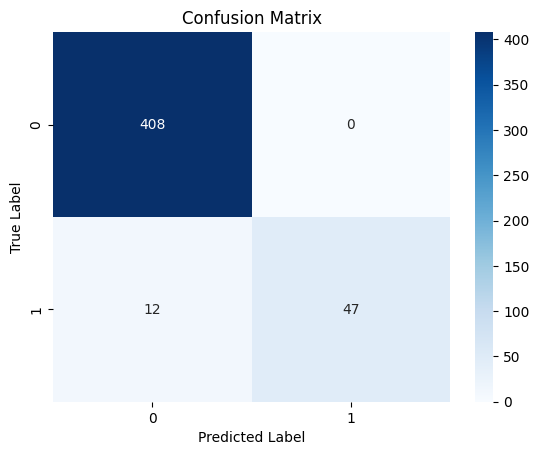

Cross-Validation Accuracy: 0.97 ± 0.02


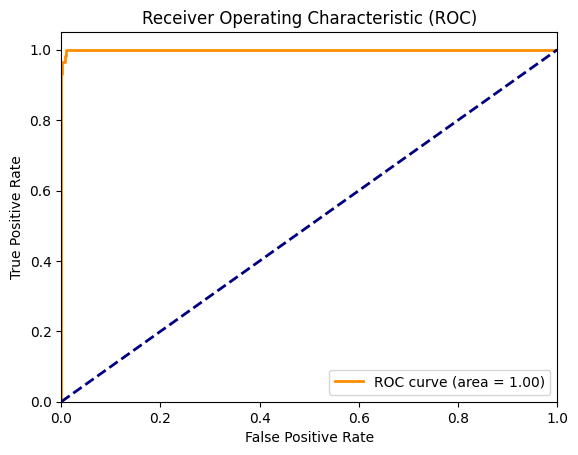

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.98


In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Load the dataset
filename = "dataset.csv"
df = pd.read_csv(filename)

# Separate features and labels
X = df.drop(columns=["Label"])  # Features (all columns except the label)
y = df["Label"]  # Labels

# Handle missing values by filling them with the mean of each column
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# ROC Curve and AUC (for binary classification only)
if len(set(y)) == 2:
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binarized, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Hyperparameter Tuning using Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
filename = "dataset.csv"
df = pd.read_csv(filename)

# Separate features and labels
X = df.drop(columns=["Label"])  # Features (all columns except the label)
y = df["Label"]  # Labels

# Handle missing values by filling them with the mean of each column
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# # Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Training features shape: (1864, 5)
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       434
           1       1.00      0.15      0.26        33

    accuracy                           0.94       467
   macro avg       0.97      0.58      0.62       467
weighted avg       0.94      0.94      0.92       467



In [ ]:
import joblib

# Save the model to a file
joblib.dump(svm_model, "ais_modelv4.pkl")

# Load the model from the file
loaded_model = joblib.load("ais_modelv4.pkl")
